In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [24]:
x = iris['data'][:, 0].reshape(-1,1)
y = (iris['target'] == 0).astype(np.int64)

In [25]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(solver='lbfgs', C=.1, random_state=1)
logReg.fit(x,y)

LogisticRegression(C=0.1, random_state=1)

In [26]:
yPred = logReg.predict(x)

In [27]:
#Metrics

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [28]:
confusion_matrix(y, yPred)

array([[94,  6],
       [11, 39]])

In [29]:
precision_score(y, yPred)

0.8666666666666667

In [30]:
recall_score(y, yPred)

0.78

In [31]:
f1_score(y, yPred)

0.8210526315789474

In [34]:
#Decision function(Confidence scores)
# h = b + w1x1

logReg.intercept_ + logReg.coef_ * x[0]

array([[0.19645081]])

In [35]:
h = logReg.decision_function(x)
h[0]

0.19645080546116045

In [36]:
#Adjust Threshold

#Threshold = 0.1

threshold = 0.1

yPredMod = (h > threshold).astype(int)
yPredMod

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
#Mertics

confusion_matrix(y, yPredMod)

array([[95,  5],
       [14, 36]])

In [38]:
precision_score(y, yPredMod)

0.8780487804878049

In [39]:
recall_score(y, yPredMod)

0.72

In [40]:
f1_score(y, yPredMod)

0.7912087912087912

In [45]:
#PR curve

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, h)

In [46]:
thresholds

array([-4.09261941, -3.78625725, -3.63307617, -3.32671401, -3.17353293,
       -3.02035185, -2.86717077, -2.7139897 , -2.56080862, -2.40762754,
       -2.25444646, -2.10126538, -1.9480843 , -1.79490322, -1.64172214,
       -1.48854106, -1.33535998, -1.18217891, -1.02899783, -0.87581675,
       -0.72263567, -0.56945459, -0.41627351, -0.26309243, -0.10991135,
        0.04326973,  0.19645081,  0.34963188,  0.50281296,  0.65599404,
        0.80917512,  0.9623562 ,  1.11553728,  1.26871836,  1.42189944])

In [47]:
precisions

array([0.33333333, 0.33557047, 0.34482759, 0.34722222, 0.34965035,
       0.35211268, 0.35971223, 0.36231884, 0.3649635 , 0.37593985,
       0.38461538, 0.40983607, 0.41666667, 0.43478261, 0.46296296,
       0.50505051, 0.52631579, 0.56179775, 0.60240964, 0.625     ,
       0.67123288, 0.72307692, 0.79661017, 0.86538462, 0.86956522,
       0.86666667, 0.87804878, 0.875     , 0.90909091, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [48]:
recalls

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.94,
       0.94, 0.9 , 0.8 , 0.78, 0.72, 0.56, 0.4 , 0.32, 0.22, 0.18, 0.1 ,
       0.08, 0.02, 0.  ])

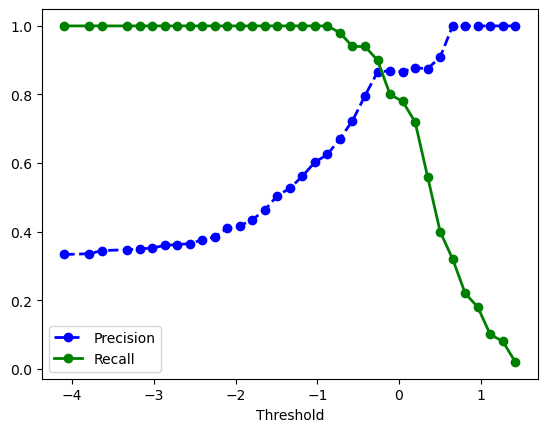

In [50]:
plt.plot(thresholds, precisions[:-1],'bo--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'go-', label='Recall', linewidth=2)
plt.xlabel('Threshold')
plt.legend()
plt.show()

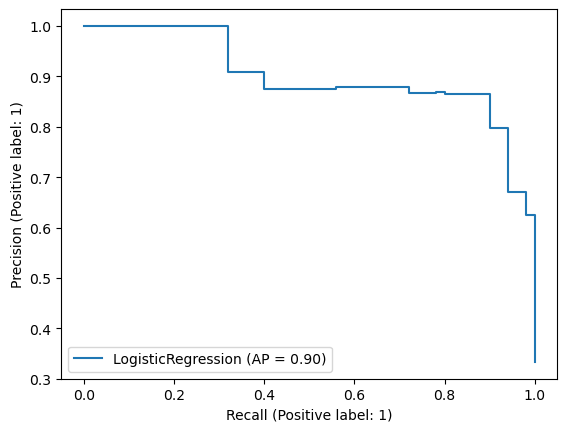

In [52]:
#PR Curve

from sklearn.metrics import PrecisionRecallDisplay   #新版已變更

PrecisionRecallDisplay.from_estimator(logReg, x, y)   #新版已變更
plt.show()

In [53]:
#ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, h)

In [54]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.04, 0.05, 0.06,
       0.06, 0.07, 0.12, 0.18, 0.24, 0.3 , 0.33, 0.45, 0.49, 0.58, 0.65,
       0.7 , 0.72, 0.8 , 0.83, 0.87, 0.89, 0.92, 0.95, 0.99, 1.  ])

In [55]:
tpr

array([0.  , 0.02, 0.08, 0.1 , 0.18, 0.22, 0.32, 0.4 , 0.56, 0.72, 0.78,
       0.8 , 0.9 , 0.94, 0.94, 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [56]:
thresholds

array([        inf,  1.42189944,  1.26871836,  1.11553728,  0.9623562 ,
        0.80917512,  0.65599404,  0.50281296,  0.34963188,  0.19645081,
        0.04326973, -0.10991135, -0.26309243, -0.41627351, -0.56945459,
       -0.72263567, -0.87581675, -1.02899783, -1.33535998, -1.48854106,
       -1.64172214, -1.79490322, -1.9480843 , -2.10126538, -2.25444646,
       -2.40762754, -2.56080862, -2.86717077, -3.02035185, -3.63307617,
       -3.78625725, -4.09261941])

<function matplotlib.pyplot.show(close=None, block=None)>

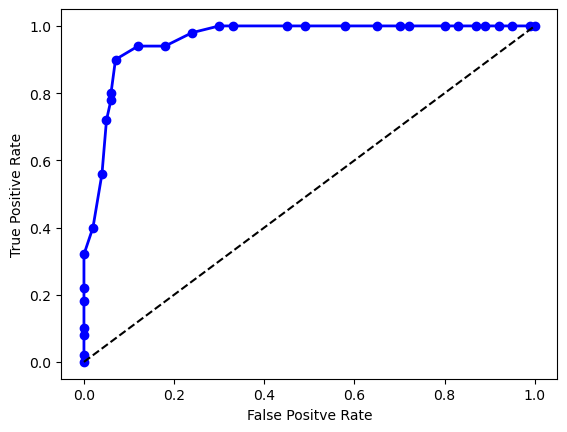

In [57]:
plt.plot(fpr, tpr, 'bo-', linewidth=2, label='roc_curve_plot')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.show

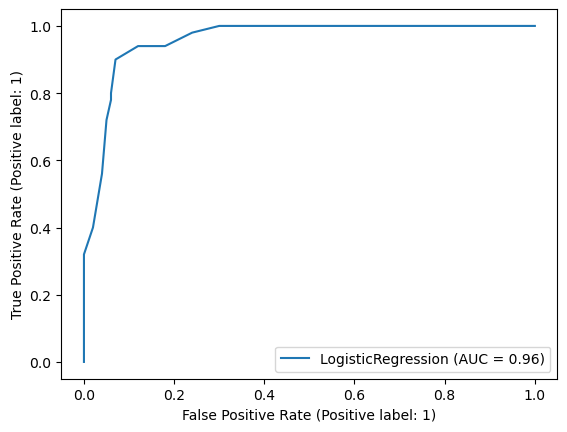

In [64]:
from sklearn.metrics import RocCurveDisplay  #新版已變更

RocCurveDisplay.from_estimator(logReg, x, y)  #新版已變更
plt.show()

In [65]:
#AUC

from sklearn.metrics import roc_auc_score

roc_auc_score(y, h)

0.9586